In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Problem Statement
*This is a Real Estate price data. These estates are located all over the city and the prices have been decided as per the convenience and facilities available near to these estates.
This is a regression problem where we have to predict the prices of the estates as per the customer convenience he prefers.
Real Estate prediction is a very common real-life issue that each real estate agent faces at least once in its lifetime. If done correctly, it can save a lot of man-hours at the end and give the predictions correct.*

# Hypothesis generation
*There are some factors that should be brainstormed before getting into code. Below are some factors that matter and put a weightage on the required predictions:
        __House age:__ This is the age of the house which is a very important feature that how old the house is and how much more the life of the house will be.
        __Nearest to MRT Station:__ The should nearest to the MRT station will get costly because the convenience get better.
        __Convenience Stores:__ Near the stores, the more life will get more convenient as in case of emergencies, the products will be available just a foot away.
All the above factors make the difference between the low and high price houses.*

In [2]:
file = pd.read_csv('Real estate.csv')
file.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
def basic_info(df):
    print(df.info(),'\n',df.describe(),'\n',df.isna().sum(),'\n',file.shape)

In [4]:
basic_info(file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None 
                No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.1489

## Observations

*We can see that there are no null values.*

# EDA

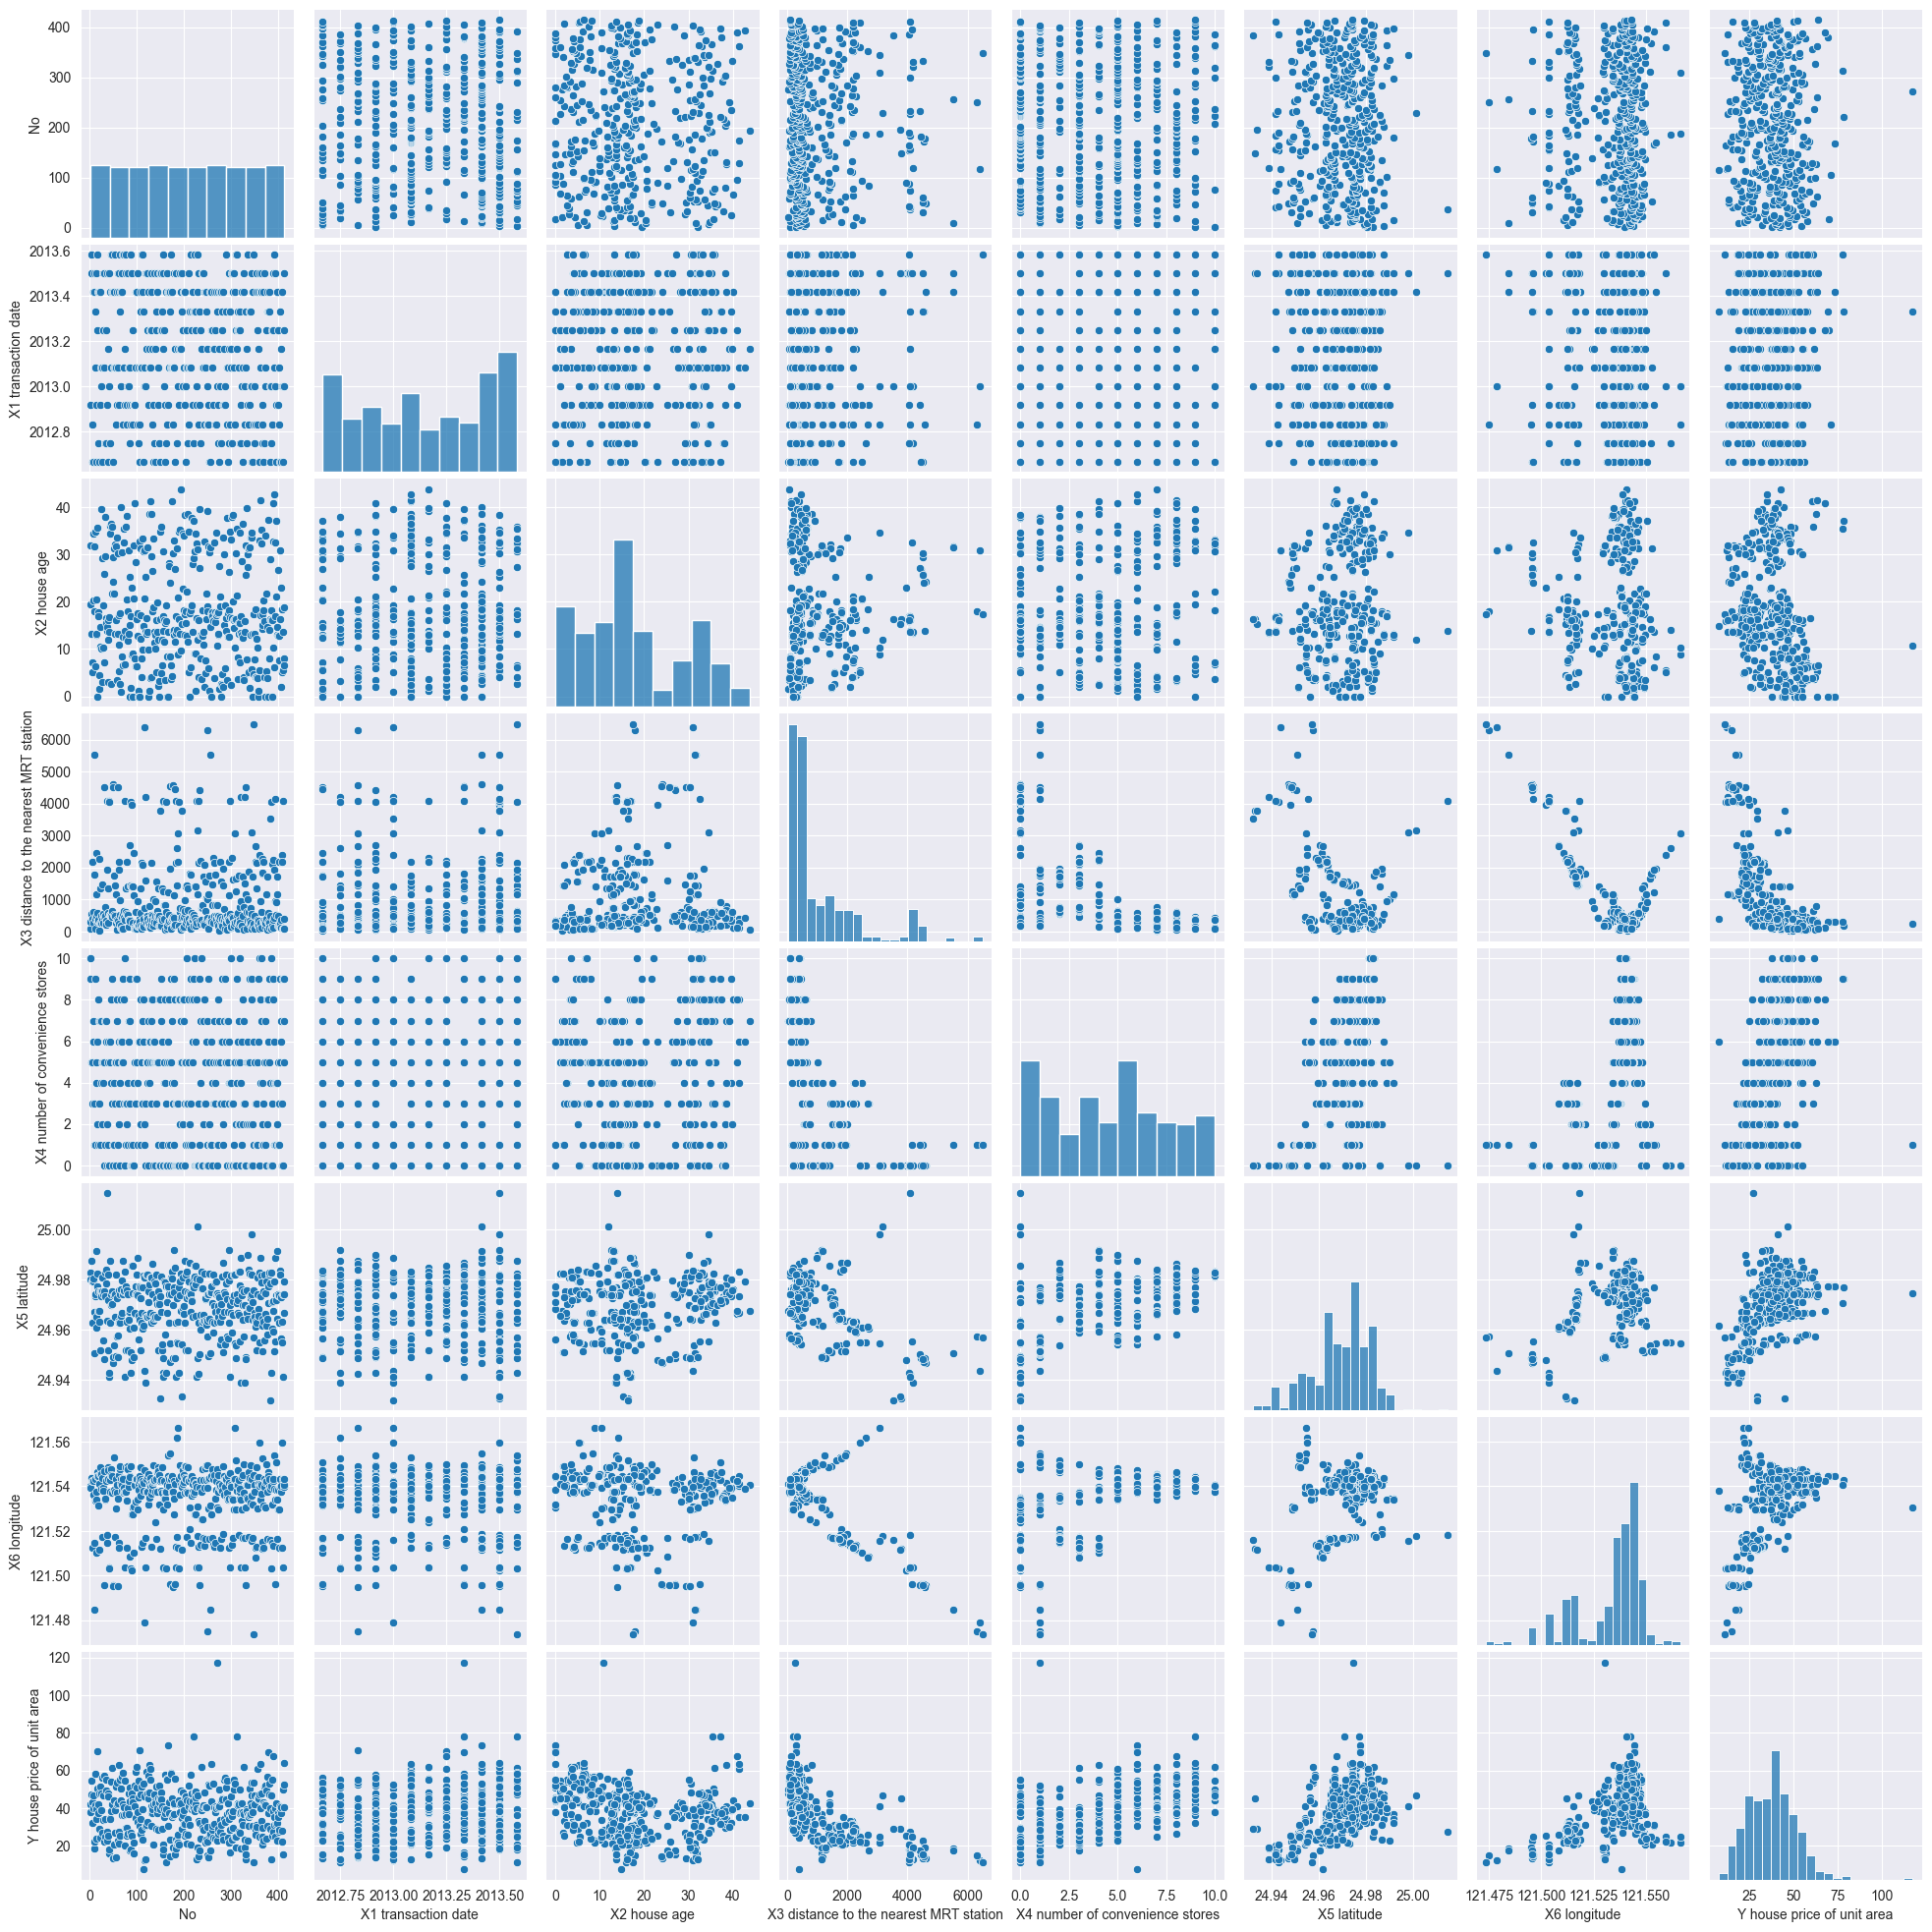

In [5]:
sns.pairplot(file)

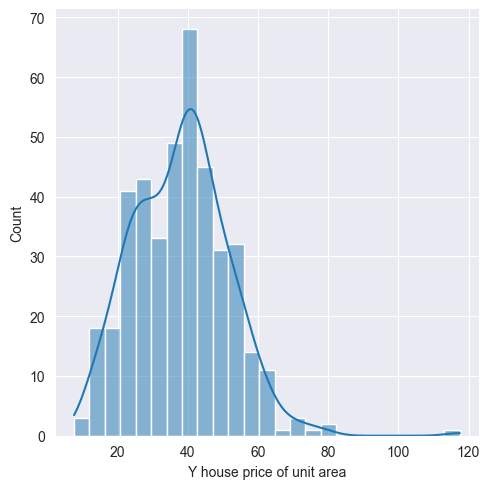

In [6]:
sns.displot(data= file, x='Y house price of unit area' , bins=25 , kde=True)

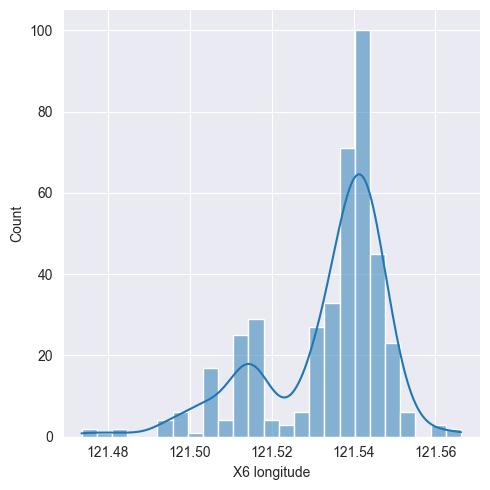

In [7]:
sns.displot(data= file, x='X6 longitude' , bins=25 , kde=True)

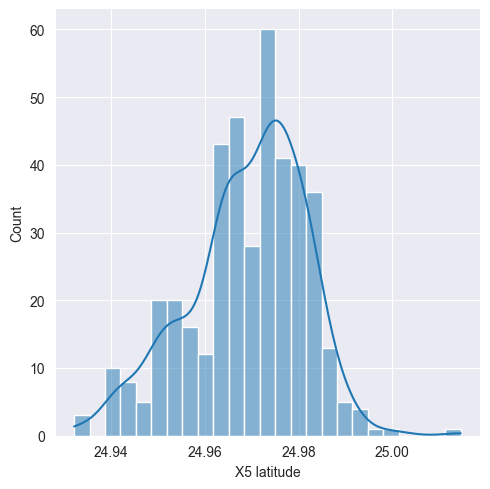

In [8]:
sns.displot(data= file, x='X5 latitude' , bins=25 , kde=True)

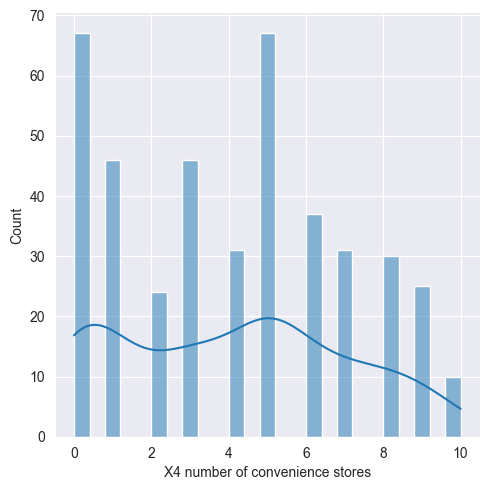

In [9]:
sns.displot(data= file, x='X4 number of convenience stores' , bins=25 , kde=True)

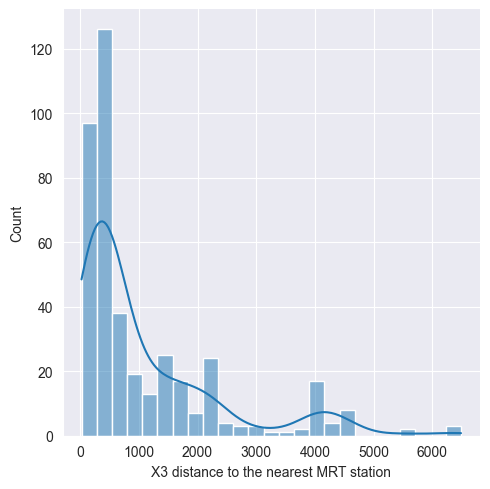

In [10]:
sns.displot(data= file, x='X3 distance to the nearest MRT station' , bins=25 , kde=True)

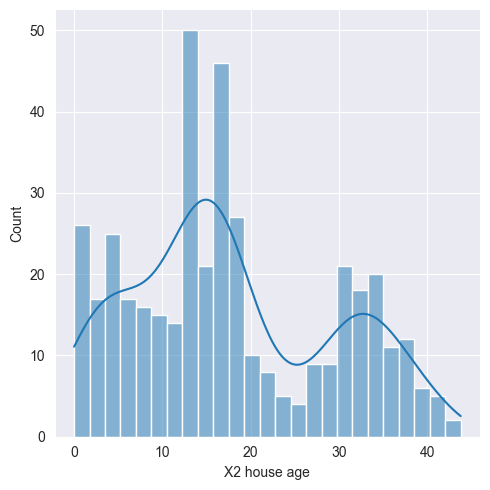

In [11]:
sns.displot(data= file, x='X2 house age' , bins=25 , kde=True)

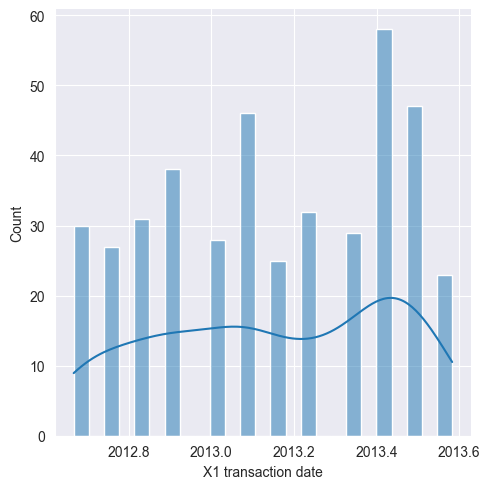

In [12]:
sns.displot(data= file, x='X1 transaction date' , bins=25 , kde=True)

<AxesSubplot: >

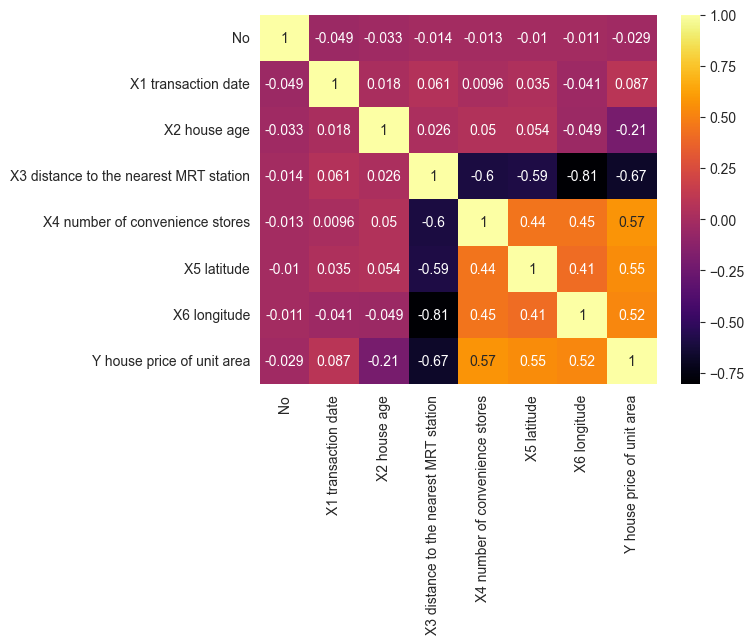

In [15]:
sns.heatmap(file.corr(),annot=True,cmap='inferno')

EDA showed us that the following factors have a direct impact on sales:
__Price:__
__Longitude:__
__latitude:__
__Distance to the nearest MRT station:__
__House age:__

# Regression

In [16]:
dataset = pd.read_csv('Real estate.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,  -1].values

### Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)